In [1]:
import numpy as np
from sklearn.datasets import load_diabetes

In [2]:
X,y=load_diabetes(return_X_y=True)

In [3]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [4]:
X.shape

(442, 10)

In [5]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
y.shape

(442,)

# Using Sklearn's LinearRegression

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [11]:
reg.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred=reg.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score(y_test,y_pred)

0.4399387660024645

In [15]:
reg.coef_

array([  -9.16088483, -205.46225988,  516.68462383,  340.62734108,
       -895.54360867,  561.21453306,  153.88478595,  126.73431596,
        861.12139955,   52.41982836])

In [16]:
reg.intercept_

151.88334520854633

# Making our own LinearRegression class using OLS

In [29]:
class MeraLR:
    
    def __init__(self):
        self.coef_=None
        self.intercept_=None
        
    def fit(self,X_train,y_train):
        X_train=np.insert(X_train,0,1,axis=1)
            
        #calculate the coefficients
        betas=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_=betas[0]
        self.coef_=betas[1:]
        print(betas)
            
        
    def predict(self,X_test):
        y_pred=np.dot(X_test,self.coef_)+self.intercept_
        return y_pred
            

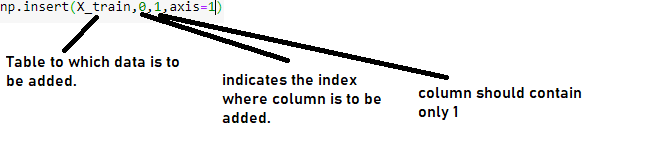

In [30]:
lr=MeraLR()

In [31]:
lr.fit(X_train,y_train)

[ 151.88334521   -9.16088483 -205.46225988  516.68462383  340.62734108
 -895.54360867  561.21453306  153.88478595  126.73431596  861.12139955
   52.41982836]


In [32]:
X_train.shape

(353, 10)

In [33]:
y_pred=lr.predict(X_test)

In [34]:
y_pred.shape

(89,)

In [35]:
r2_score(y_test,y_pred)

0.4399387660024646

In [36]:
lr.coef_

array([  -9.16088483, -205.46225988,  516.68462383,  340.62734108,
       -895.54360867,  561.21453306,  153.88478595,  126.73431596,
        861.12139955,   52.41982836])

In [38]:
lr.intercept_

151.88334520854633